In [1]:
import sys

sys.path.insert(1, '../..')
import ROOT

Welcome to JupyROOT 6.24/02


In [2]:
%config Completer.use_jedi = False

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions.other_functions import process_date, process_exposure, chi2, linear
import random
# from tqdm import tqdm_notebook
%matplotlib inline 

In [4]:
file = open("/Users/williamquinn/Desktop/ratios.csv", 'r')
fl = file.readlines()
x = []
y = []
for index, line in enumerate(fl):
    line_list = line.split(",")
    x.append(int(line_list[0].strip()))
    y.append(float(line_list[1].strip()))
x = np.array(x)
y = np.array(y)

In [5]:
import pandas as pd
def my_matrix():
    df = pd.read_csv("/Users/williamquinn/Desktop/HeMatrix.txt",
                     index_col=0)
    df = df / 500
    df.loc["i0", "0"] = 1
    M = df.values
    
    return M
print(my_matrix())

[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.968 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.03  0.05  0.902 0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.004 0.082 0.114 0.764 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.006 0.03  0.142 0.188 0.582 0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.012 0.038 0.204 0.29  0.428 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.004 0.03  0.106 0.244 0.274 0.322 0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.002 0.01  0.086 0.186 0.266 0.258 0.158 0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.002 0.006 0.034 0.134 0.23  0.284 0.178 0.094 0.    0.    0.
 

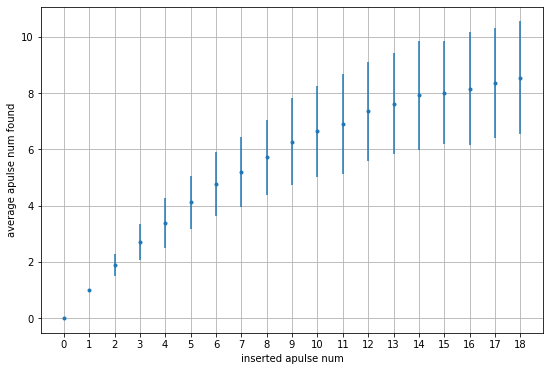

In [6]:
averages = []
stds = []
M = my_matrix()
nums = np.array([i for i in range(len(M[0]))])
plt.figure(figsize=(9,6), facecolor='white')
for i_row in range(len(M)):
    weights = []
    for i_col in range(len(M[i_row])):
        weights.append(M[i_row][i_col])
    weights = np.array(weights)
    average = np.average(nums, weights=weights)
    
    std = np.sqrt( np.sum(weights*(nums - average)**2)/np.sum(weights) )
    stds.append(std)
    averages.append(average)
plt.errorbar(nums, averages, yerr=stds, fmt=".")
plt.grid()
plt.xlabel("inserted apulse num")
plt.ylabel("average apulse num found")
_ =plt.xticks([i for i in range(len(M[0]))])

Text(0.5, 0, 'num apulses')

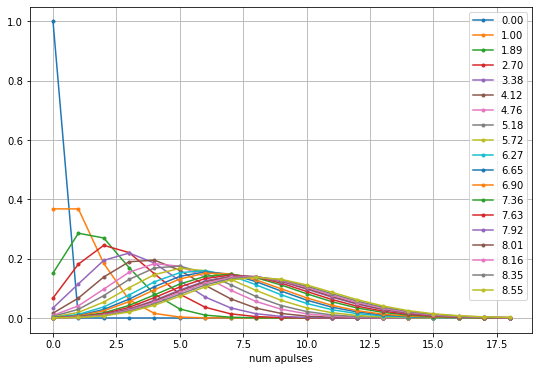

In [7]:
plt.figure(figsize=(9,6), facecolor='white')
for i_mean in averages:
    probs = []
    for n in nums:
        prob = np.exp(-1*i_mean)*(i_mean**n)/np.math.factorial(n)
        probs.append(prob)
    plt.plot(probs, ".-", label='{:.2f}'.format(i_mean))

    number = np.dot(averages, probs)
plt.grid()
plt.legend(loc='best')
plt.xlabel('num apulses')

Text(0.5, 0, 'num apulses')

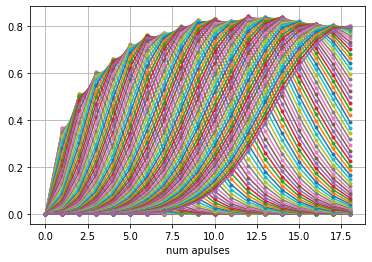

In [8]:
means = np.linspace(0, 18, 19*5)
f = []
for i_mean in means:
    probs = []
    for n in nums:
        prob = np.exp(-1*i_mean)*(i_mean**n)/np.math.factorial(n) * averages[n]
        probs.append(prob)
    f.append(np.sum(probs))
        
    plt.plot(probs, ".-", label='{:.2f}'.format(i_mean))

plt.grid()
# plt.legend(loc='best')
plt.xlabel('num apulses')
        

Text(0.5, 1.0, 'y=7.5e-02$x^2$ + 9.6e-01$x$ + 1.2e-02')

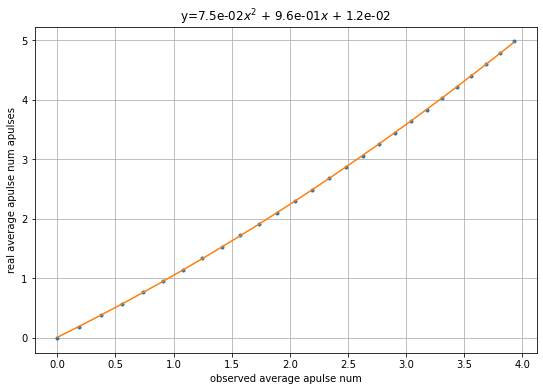

In [9]:
f = np.array(f)
my_list = np.where(means < 5)[0]
def test_model(x, q, m, c):
    return q*x*x + m*x + c
t_popt, t_pcov = curve_fit(f=test_model, xdata=f[my_list], ydata=means[my_list])
plt.figure(figsize=(9,6), facecolor='white')
plt.plot(f[my_list], means[my_list], ".")

plt.plot(f[my_list], test_model(f[my_list], *t_popt))
plt.grid()
plt.ylabel('real average apulse num apulses')
plt.xlabel('observed average apulse num')
plt.title(r'y={:.1e}$x^2$ + {:.1e}$x$ + {:.1e}'.format(t_popt[0], t_popt[1], t_popt[2]))

In [10]:
file = open("/Users/williamquinn/Desktop/aan.csv", 'r')
fl = file.readlines()
x = []
y = []
for index, line in enumerate(fl):
    line_list = line.split(",")
    x.append(int(line_list[0].strip()))
    y.append(float(line_list[1].strip()))
x = np.array(x)
y = np.array(y)

1).  $\Gamma(t) = P_0 \bigg(p_e't + \frac{12Lp_e'}{\pi^2}\sum^{50}_{n=1}\frac{\cos(n\pi)}{n^2}\big[1 - e^{\frac{-n^2t}{6L}}\big]\bigg) + P_2$  

2).  $\Gamma(t) = \big(1-\frac{1}{1 + e^{\frac{-(t-A)}{B}}}\big)P_0 \bigg(p_e't + \frac{12Lp_e'}{\pi^2}\sum^{50}_{n=1}\frac{\cos(n\pi)}{n^2}\big[1 - e^{\frac{-n^2t}{6L}}\big]\bigg) + P_2$    

3).  $\Gamma(t) = \big(1-\frac{1}{1 + e^{\frac{-(t-A)}{B}}}\big)\Bigg[P_0 \bigg(p_e(t+98) + \frac{12Lp_e}{\pi^2}\sum^{50}_{n=1}\frac{\cos(n\pi)}{n^2}\big[1 - e^{\frac{-n^2(t+98)}{6L}}\big]\bigg) + P_0 \bigg(p_e't + \frac{12Lp_e'}{\pi^2}\sum^{50}_{n=1}\frac{\cos(n\pi)}{n^2}\big[1 - e^{\frac{-n^2t}{6L}}\big]\bigg) + P_2\Bigg]$

 $L = \frac{l^2}{6D}$

In [23]:
def model(x, p0, p1, L):
    y = []
    p = 101325/10
    for i in range(len(x)):
        t = x[i]*3600*24
        temp = 0
        for n in range(1,50):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/(L*6)))
        f2 = (12/np.pi**2)*L*temp
        y.append(p0*p*(t + f2) + p1)
    return y

def model_eff(x, p0, p1, L, A, B):
    y = []
    p = 101325/10
    for i in range(len(x)):
        t = x[i]*3600*24
        temp = 0
        for n in range(1,50):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/(L*6)))
        f2 = (12/np.pi**2)*L*temp
        y.append((1 - 1/( 1 + np.exp(-1*(t-A)/B)))*(p0*p*(t + f2) + p1))
    return y

def model_0(x, p0, p1, L):
    y = []
    pe_0 = 101325/100
    pe_1 = 101325/10
    for i in range(len(x)):
        t_0 = (x[i]+98)*3600*24
        t_1 = t_0 - (98*3600*24)
        temp_0 = 0
        temp_1 = 0
        for n in range(1,50):
            temp_0 += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t_0/(L*6)))
            temp_1 += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t_1/(L*6)))
        f_0 = (12/np.pi**2)*L*temp_0
        f_1 = (12/np.pi**2)*L*temp_1
        y.append(p0*(pe_0*(t_0 + f_0) + pe_1*(t_1 + f_1)) + p1)
    return y

def model_eff_0(x, p0, p1, L, A, B):
    y = []
    pe_0 = 101325/100
    pe_1 = 101325/10
    for i in range(len(x)):
        t_0 = (x[i]+98)*3600*24
        t_1 = t_0 - (98*3600*24)
        temp_0 = 0
        temp_1 = 0
        for n in range(1,50):
            temp_0 += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t_0/(L*6)))
            temp_1 += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t_1/(L*6)))
        f_0 = (12/np.pi**2)*L*temp_0
        f_1 = (12/np.pi**2)*L*temp_1
        y.append((1 - 1/( 1 + np.exp(-1*(t_1-A)/B)))*p0*(pe_0*(t_0 + f_0) + pe_1*(t_1 + f_1)) + p1)
    return y

def r_model(x, p0, p1, L):
    y = []
    t = x*3600*24
    p = 101325/10
    y = p0*p*(t - L) + p1
    return y

def r_model_eff(x, p0, p1, L, A, B):
    y = []
    t = x*3600*24
    p = 101325/10
    y = (1 - 1/( 1 + np.exp(-1*(t_1-A)/B)))*(p0*p*(t - L) + p1)
    return y

def eff(x, A, B):
    y = []
    for i in range(len(x)):
        t = x[i]*3600*24
        y.append( 1 - 1/( 1 + np.exp(-1*(t-A)/B)) )
    return y

In [12]:
L_guess = 0.1**2/(6*1e-12)
print(L_guess)

1666666666.666667


In [13]:
filenames = open("/Users/williamquinn/Desktop/S95_A25/filenames.txt", "r")
fl = filenames.readlines()
files = []
for index, line in enumerate(fl):
    files.append(line.strip())
path = "/Users/williamquinn/Desktop/S95_A25/"
root_file = ROOT.TFile(path + files[0], "READ")

In [14]:
aan_ch0 = []
aan_ch1 = []
dates_ch0 = []
dates_ch1 = []
for i_file in files:
    date = i_file.split("_")[0]
    try:
        root_file = ROOT.TFile(path + i_file, "READ")
        num_hist = root_file.Get(date + "_GAO607_he_apulse_num_1400V")

        contents = []
        weights = []
        for i_bin in range(num_hist.GetNbinsX() + 1):
            contents.append(i_bin - 1)
            weights.append(num_hist.GetBinContent(i_bin)/num_hist.GetEntries())
        average = np.average(contents, weights=weights)
        aan_ch0.append(average)
        # print(num_hist.GetMean(), average)
        del num_hist
        del root_file
        dates_ch0.append(int(date))
    except:
        print(0, path + i_file, date)
    try:
        root_file_1 = ROOT.TFile(path + i_file, "READ")
        num_hist_1 = root_file_1.Get(date + "_GAO612_he_apulse_num_1400V")

        contents = []
        weights = []
        for i_bin in range(num_hist_1.GetNbinsX() + 1):
            contents.append(i_bin - 1)
            weights.append(num_hist_1.GetBinContent(i_bin)/num_hist_1.GetEntries())
        average = np.average(contents, weights=weights)
        aan_ch1.append(average)
        # print(num_hist.GetMean(), average)
        del num_hist_1
        del root_file_1
        dates_ch1.append(int(date))
    except:
        print(1, path + i_file, date)

dates_ch0s = process_date(dates_ch0)[:-2]
dates_ch1s = process_date(dates_ch1)[:-2]
aan_ch0s = aan_ch0[:-2]
aan_ch1s = aan_ch1[:-2]
start_ch0 = np.where(dates_ch0s == 98)[0][0]
start_ch1 = np.where(dates_ch1s == 98)[0][0]
x = np.array(dates_ch0s[start_ch0:]) - dates_ch0s[start_ch0]
y = np.array(aan_ch0s[start_ch0:])
y_ = t_popt[0]*y*y + t_popt[1]*y + t_popt[0]

1 /Users/williamquinn/Desktop/S95_A25/191106_A1400_B1400_t2155_output.root 191106
1 /Users/williamquinn/Desktop/S95_A25/201104_A1400_B1400_t2159_output.root 201104


Text(0.5, 0, 'exposure time relative to 11/02/2020 /days')

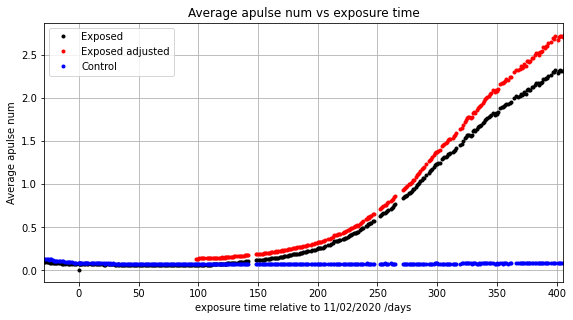

In [15]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(dates_ch0s, aan_ch0s, 'k.', label='Exposed')
plt.plot(x+98, y_, 'r.', label='Exposed adjusted')
plt.plot(dates_ch1s, aan_ch1s, 'b.', label='Control')
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(dates_ch0s[0], dates_ch0s[-3])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")
plt.xlabel("exposure time relative to 11/02/2020 /days")

Text(0.5, 0, 'exposure time relative to 11/02/2020 /days')

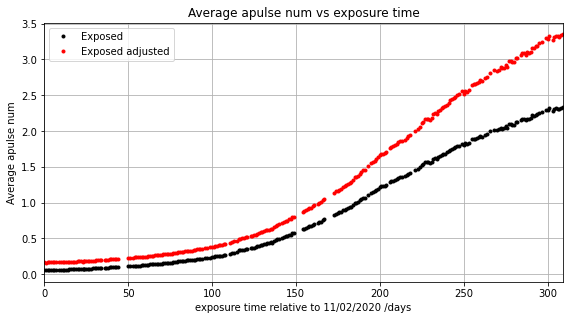

In [16]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(x, y, 'k.', label='Exposed')
plt.plot(x, y_, 'r.', label='Exposed adjusted')
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(x[0], x[-1])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")
plt.xlabel("exposure time relative to 11/02/2020 /days")

In [17]:
error_size = np.ones_like(y)*0.05

[1.52157404e-11 6.84553328e-02 1.13070189e+07] [[3.71827068e-26 5.31936042e-16 3.72007211e-08]
 [5.31936042e-16 3.38549373e-05 7.89220524e+02]
 [3.72007211e-08 7.89220524e+02 4.10319583e+10]]
[1.90655699e-11 1.46360233e-01 1.30285201e+07] [[5.78330140e-26 6.52408915e-16 4.55413324e-08]
 [6.52408915e-16 3.15031500e-05 7.22297570e+02]
 [4.55413324e-08 7.22297570e+02 3.87268994e+10]]


/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_28847/2065233235.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


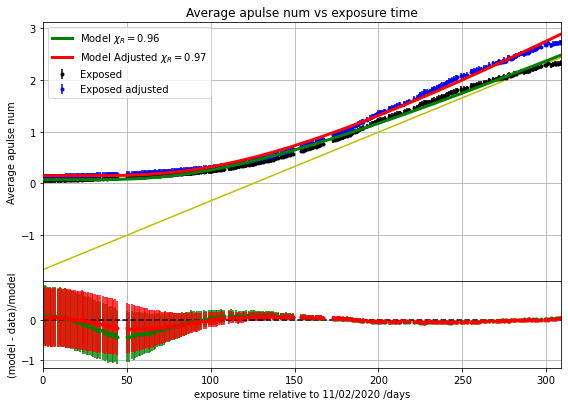

In [25]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
guess = [2.21123204e-11, 1.33516864e-01, 1.43650507e+07]
bounds = [[guess[i] - guess[i]/2 for i in range(len(guess))], [guess[i] + guess[i]/2 for i in range(len(guess))]]

popt, pcov = curve_fit(f=model, xdata=x, ydata=y, p0=guess)
popt_, pcov_ = curve_fit(f=model, xdata=x, ydata=y_, p0=guess)
print(popt, pcov)
print(popt_, pcov_)
chi = chi2(y, error_size, (model(x, *popt)), len(popt))
chi_ = chi2(y_, error_size, (model(x, *popt_)), len(popt_))

frame1=fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(x, y, yerr=error_size, fmt='k.', label='Exposed')
plt.plot(x, model(x, *popt), 'g-', linewidth=3, zorder=10, label=r'Model $\chi_R=${:.2f}'.format(chi))
plt.errorbar(x, y_, yerr=error_size, fmt='b.', label='Exposed adjusted')
plt.plot(x, model(x, *popt_), 'r-', linewidth=3, zorder=10, label=r'Model Adjusted $\chi_R=${:.2f}'.format(chi_))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.plot(x, r_model(x, *popt), 'y')
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(x[0], x[-1])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")


frame2=fig1.add_axes((.1,.1,.8,.2))
plt.errorbar(x, (model(x, *popt) - y)/model(x, *popt), yerr=error_size/model(x, *popt), fmt='g.')
plt.errorbar(x, (model(x, *popt_) - y_)/model(x, *popt_), yerr=error_size/model(x, *popt), fmt='r.')
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.xlim(x[0], x[-1])
# plt.ylim(-0.25, 0.25)
plt.ylabel("(model - data)/model")
plt.xlabel("exposure time relative to 11/02/2020 /days")
plt.tight_layout()
# plt.savefig('/Users/williamquinn/Desktop/model.pdf')

[2.73836056e-11 1.06234990e-01 1.68440129e+07 3.18837265e+07
 5.73493526e+06] [[ 1.78606540e-27 -5.00494300e-17  7.19500150e-25  3.86960509e-25
  -2.33628948e-25]
 [-5.00494300e-17  3.34158538e-06 -4.80379335e-14 -2.58356905e-14
   1.55984010e-14]
 [ 7.19500150e-25 -4.80379335e-14  6.90583297e-22  3.71408490e-22
  -2.24239355e-22]
 [ 3.86960509e-25 -2.58356905e-14  3.71408490e-22  1.99750366e-22
  -1.20600079e-22]
 [-2.33628948e-25  1.55984010e-14 -2.24239355e-22 -1.20600079e-22
   7.28127779e-23]]
[3.02187974e-11 1.74586126e-01 1.75884975e+07 3.26160090e+07
 4.73378470e+06] [[ 2.09070967e-27 -5.82688381e-17  8.68826838e-25  4.87296259e-25
  -5.39689523e-25]
 [-5.82688381e-17  3.78298550e-06 -5.64068110e-14 -3.16367160e-14
   3.50382419e-14]
 [ 8.68826838e-25 -5.64068110e-14  8.41062785e-22  4.71724319e-22
  -5.22443315e-22]
 [ 4.87296259e-25 -3.16367160e-14  4.71724319e-22  2.64574580e-22
  -2.93021189e-22]
 [-5.39689523e-25  3.50382419e-14 -5.22443315e-22 -2.93021189e-22
   3.2452632

TypeError: r_model() takes 4 positional arguments but 6 were given

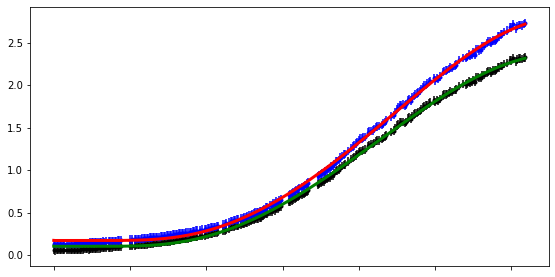

In [21]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
guess = [3.50980737e-11, 2.12469979e-01, 1.71722438e+07, 3.25114206e+07, 4.22330995e+06]
bounds = [[guess[i] - guess[i]/2 for i in range(len(guess))], [guess[i] + guess[i]/2 for i in range(len(guess))]]

popt_eff, pcov_eff = curve_fit(f=model_eff, xdata=x, ydata=y, p0=guess, bounds=bounds)
popt_eff_, pcov_eff_ = curve_fit(f=model_eff, xdata=x, ydata=y_, p0=guess, bounds=bounds)
print(popt_eff, pcov_eff)
print(popt_eff_, pcov_eff_)
chi_eff = chi2(y, error_size, (model_eff(x, *popt_eff)), len(popt_eff))
chi_eff_ = chi2(y_, error_size, (model_eff(x, *popt_eff_)), len(popt_eff_))

frame1=fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(x, y, yerr=error_size, fmt='k.', label='Exposed')
plt.plot(x, model_eff(x, *popt_eff), 'g-', linewidth=3, zorder=10, label=r'Model $\chi_R=${:.2f}'.format(chi_eff))
plt.errorbar(x, y_, yerr=error_size, fmt='b.', label='Exposed adjusted')
plt.plot(x, model_eff(x, *popt_eff_), 'r-', linewidth=3, zorder=10, label=r'Model Adjusted $\chi_R=${:.2f}'.format(chi_eff_))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(x[0], x[-1])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")


frame2=fig1.add_axes((.1,.1,.8,.2))
plt.errorbar(x, (model_eff(x, *popt_eff) - y)/model_eff(x, *popt_eff), yerr=error_size/model_eff(x, *popt_eff), fmt='g.')
plt.errorbar(x, (model_eff(x, *popt_eff_) - y_)/model_eff(x, *popt_eff_), yerr=error_size/model_eff(x, *popt_eff_), fmt='r.')
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.xlim(x[0], x[-1])
# plt.ylim(-0.25, 0.25)
plt.ylabel("(model - data)/model")
plt.xlabel("exposure time relative to 11/02/2020 /days")
plt.tight_layout()
# plt.savefig('/Users/williamquinn/Desktop/model.pdf')

[1.50506894e-11 6.71123960e-02 1.35086314e+07] [[ 4.24417263e-27 -2.30354613e-16  3.84018112e-24]
 [-2.30354613e-16  2.34693011e-05 -3.91250540e-13]
 [ 3.84018112e-24 -3.91250540e-13  6.52243475e-21]]
[2.21123120e-11 1.33516726e-01 1.43650443e+07] [[ 6.34018162e-27 -3.21609282e-16  6.99458190e-24]
 [-3.21609282e-16  3.11193996e-05 -6.76806303e-13]
 [ 6.99458190e-24 -6.76806303e-13  1.47196533e-20]]


/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_8808/3404334409.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


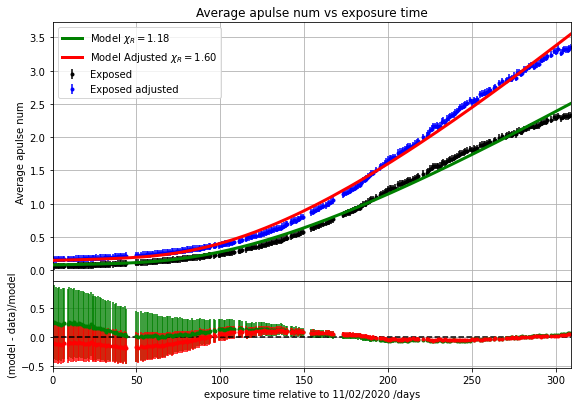

In [20]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
guess = [2.21123204e-11, 1.33516864e-01, 1.43650507e+07]
bounds = [[guess[i] - guess[i]/2 for i in range(len(guess))], [guess[i] + guess[i]/2 for i in range(len(guess))]]

popt_0, pcov_0 = curve_fit(f=model_0, xdata=x, ydata=y, p0=guess, bounds=bounds)
popt_0_, pcov_0_ = curve_fit(f=model_0, xdata=x, ydata=y_, p0=guess, bounds=bounds)
print(popt_0, pcov_0)
print(popt_0_, pcov_0_)
chi_0 = chi2(y, error_size, (model_0(x, *popt_0)), len(popt_0))
chi_0_ = chi2(y_, error_size, (model_0(x, *popt_0_)), len(popt_0_))

frame1=fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(x, y, yerr=error_size, fmt='k.', label='Exposed')
plt.plot(x, model_0(x, *popt_0), 'g-', linewidth=3, zorder=10, label=r'Model $\chi_R=${:.2f}'.format(chi_0))
plt.errorbar(x, y_, yerr=error_size, fmt='b.', label='Exposed adjusted')
plt.plot(x, model_0(x, *popt_0_), 'r-', linewidth=3, zorder=10, label=r'Model Adjusted $\chi_R=${:.2f}'.format(chi_0_))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(x[0], x[-1])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")


frame2=fig1.add_axes((.1,.1,.8,.2))
plt.errorbar(x, (model_0(x, *popt_0) - y)/model_0(x, *popt_0), yerr=error_size/model_0(x, *popt_0), fmt='g.')
plt.errorbar(x, (model_0(x, *popt_0_) - y_)/model_0(x, *popt_0_), yerr=error_size/model_0(x, *popt_0_), fmt='r.')
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.xlim(x[0], x[-1])
# plt.ylim(-0.25, 0.25)
plt.ylabel("(model - data)/model")
plt.xlabel("exposure time relative to 11/02/2020 /days")
plt.tight_layout()
# plt.savefig('/Users/williamquinn/Desktop/model.pdf')

[4.15905658e-11 1.06234994e-01 2.34204354e+07 2.86374966e+07
 6.33188607e+06]
[5.13533569e-11 1.81749764e-01 2.28683300e+07 3.05689652e+07
 6.33431995e+06]


/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_8808/1325873988.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


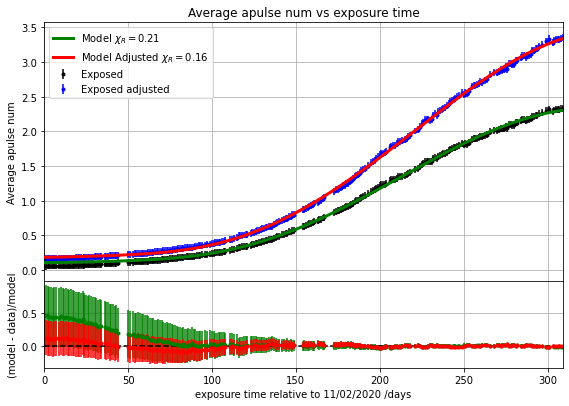

In [21]:
fig1 = plt.figure(figsize=(9,6), facecolor='white')
guess = [3.50980737e-11, 2.12469979e-01, 1.71722438e+07, 3.25114206e+07, 4.22330995e+06]
bounds = [[guess[i] - guess[i]/2 for i in range(len(guess))], [guess[i] + guess[i]/2 for i in range(len(guess))]]

popt_eff_0, pcov_eff_0 = curve_fit(f=model_eff_0, xdata=x, ydata=y, p0=guess, bounds=bounds)
popt_eff_0_, pcov_eff_0_ = curve_fit(f=model_eff_0, xdata=x, ydata=y_, p0=guess, bounds=bounds)
print(popt_eff_0)
print(popt_eff_0_)
chi_eff_0 = chi2(y, error_size, (model_eff_0(x, *popt_eff_0)), len(popt_eff_0))
chi_eff_0_ = chi2(y_, error_size, (model_eff_0(x, *popt_eff_0_)), len(popt_eff_0_))

frame1=fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(x, y, yerr=error_size, fmt='k.', label='Exposed')
plt.plot(x, model_eff_0(x, *popt_eff_0), 'g-', linewidth=3, zorder=10, label=r'Model $\chi_R=${:.2f}'.format(chi_eff_0))
plt.errorbar(x, y_, yerr=error_size, fmt='b.', label='Exposed adjusted')
plt.plot(x, model_eff_0(x, *popt_eff_0_), 'r-', linewidth=3, zorder=10, label=r'Model Adjusted $\chi_R=${:.2f}'.format(chi_eff_0_))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.grid()
plt.ylabel("Average apulse num")
plt.xlim(x[0], x[-1])
plt.legend(loc='upper left')
plt.title("Average apulse num vs exposure time")


frame2=fig1.add_axes((.1,.1,.8,.2))
plt.errorbar(x, (model_eff_0(x, *popt_eff_0) - y)/model_eff_0(x, *popt_eff_0), yerr=error_size/model_eff_0(x, *popt_eff_0), fmt='g.')
plt.errorbar(x, (model_eff_0(x, *popt_eff_0_) - y_)/model_eff_0(x, *popt_eff_0_), yerr=error_size/model_eff_0(x, *popt_eff_0_), fmt='r.')
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.xlim(x[0], x[-1])
# plt.ylim(-0.25, 0.25)
plt.ylabel("(model - data)/model")
plt.xlabel("exposure time relative to 11/02/2020 /days")
plt.tight_layout()
# plt.savefig('/Users/williamquinn/Desktop/model.pdf')

In [22]:
popts  = [popt, popt_eff, popt_0, popt_eff_0]
popts_ = [popt_, popt_eff_, popt_0_, popt_eff_0_]
pcovs = [pcov, pcov_eff, pcov_0, pcov_eff_0]
pcovs_ = [pcov_, pcov_eff_, pcov_0_, pcov_eff_0_]
chis = [chi, chi_eff, chi_0, chi_eff_0]
chis_ = [chi_, chi_eff_, chi_0_, chi_eff_0_]

In [23]:
for i in range(len(popts)):
    #if len(popts[i]) == 3:
    p0 = popts[i][0]
    p0_err = np.sqrt(pcovs[i][0,0])
    L  = popts[i][2] / 3600 / 24
    L_err = np.sqrt(pcovs[i][2,2]) / 3600 / 24
    p1 = popts[i][1]
    p1_err = np.sqrt(pcovs[i][1,1])
    print('Model:', i, 'p0: {:.3e}±{:.0e} p1: {:.3f}±{:.3f} L: {:.2f}±{}'.format(p0, p0_err, p1, p1_err, L, L_err))

Model: 0 p0: 1.522e-11±2e-13 p1: 0.068±0.006 L: 130.87±2.3445323969023453
Model: 1 p0: 2.738e-11±4e-14 p1: 0.106±0.002 L: 194.95±3.04154532431971e-16
Model: 2 p0: 1.505e-11±7e-14 p1: 0.067±0.005 L: 156.35±9.347406489862108e-16
Model: 3 p0: 4.159e-11±8e-14 p1: 0.106±0.002 L: 271.07±2.4776096730235473e-16


In [24]:
for i in range(len(popts)):
    #if len(popts[i]) == 3:
    p0 = popts_[i][0]
    p0_err = np.sqrt(pcovs_[i][0,0])
    L  = popts_[i][2] / 3600 / 24
    L_err = np.sqrt(pcovs_[i][2,2]) / 3600 / 24
    p1 = popts_[i][1]
    p1_err = np.sqrt(pcovs_[i][1,1])
    print('Model:', i, 'p0: {:.3e}±{:.0e} p1: {:.3f}±{:.3f} L: {:.2f}±{}'.format(p0, p0_err, p1, p1_err, L, L_err))

Model: 0 p0: 2.340e-11±3e-13 p1: 0.181±0.007 L: 151.17±2.277231966668235
Model: 1 p0: 3.706e-11±6e-14 p1: 0.215±0.002 L: 203.91±5.021378449423711e-16
Model: 2 p0: 2.211e-11±8e-14 p1: 0.134±0.006 L: 166.26±1.4042196547865215e-15
Model: 3 p0: 5.135e-11±6e-14 p1: 0.182±0.002 L: 264.68±3.010760271519363e-16


In [25]:
from array import array
class Model:
    def __call__(self, x, parameters):
        p = 101325/10
        p0 = parameters[0]
        p1 = parameters[1]
        L  = parameters[2]
        t  = x[0]*3600*24
        
        temp = 0
        for n in range(1,50):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/(L*6)))
        f2 = (12/np.pi**2)*L*temp
        y = p0*p*(t + f2) + p1
        return y

def the_model(x, parameters):
        p0 = parameters[0]
        p1 = parameters[1]
        L  = parameters[2]
        t  = x*3600*24
        
        temp = 0
        for n in range(1,50):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/(L*6)))
        f2 = (12/np.pi**2)*L*temp
        y = p0*p*(t + f2) + p1
        return y
    

In [26]:
canvas = ROOT.TCanvas()
guess = array('d', [1.52157116e-11, 6.84547311e-02, 1.13069872e+07])
graph = ROOT.TGraph(len(y)) 
print(x[-1] - x[0], len(y))
for i in range(len(y)):
    graph.SetPoint(i, x[i], y[i])
    
print(x[0], x[-1])

'''func_string = '[0]*10132.5*(x + (12/(TMath::Pi^2))*[2]*('
for n in range(10):
    func_string += '((-1)^{}/{}^2)*(1 - TMath::Exp(-({}^2)*(TMath::Pi^2)*x/([2]*6)))'.format(n, n, n)
func_string += ')) + [1]'
print(func_string)'''

309 269
0 309


"func_string = '[0]*10132.5*(x + (12/(TMath::Pi^2))*[2]*('\nfor n in range(10):\n    func_string += '((-1)^{}/{}^2)*(1 - TMath::Exp(-({}^2)*(TMath::Pi^2)*x/([2]*6)))'.format(n, n, n)\nfunc_string += ')) + [1]'\nprint(func_string)"

In [ ]:
fit = ROOT.TF1("func", 'Model(x, [0], [1], [2])', x[0], x[-1])
fit.SetParameter(0, guess[0])
fit.SetParameter(1, guess[1])
fit.SetParameter(2, guess[2])
fit.SetParNames("p0", "p1", "L")
fit.SetParLimits(0, guess[0] - guess[0]/2, guess[0] + guess[0]/2)
fit.SetParLimits(1, guess[1] - guess[1]/2, guess[1] + guess[1]/2)
fit.SetParLimits(2, guess[2] - guess[2]/2, guess[2] + guess[2]/2)

graph.Fit("func", "R")
graph.Draw()
canvas.Draw()

#print(fit.GetNDF())
#parameters = fit.GetParameters()
#print(parameters[0])